<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

#  Model Creation and Evaluation

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


# Set the paths to the train and test directories
train_dir = 'train'
test_dir = 'test'

# Set up the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    batch_size=32


58889256/58889256 [==============================] - 3s 0us/step


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(32,32),
                                                    batch_size=batch_size, class_mode='binary')


Found 100000 images belonging to 2 classes.


In [5]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=50)


Epoch 1/50
3125/3125 [==============================] - 98s 28ms/step - loss: 0.4285 - accuracy: 0.8008
Epoch 2/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3813 - accuracy: 0.8291
Epoch 3/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3658 - accuracy: 0.8376
Epoch 4/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3546 - accuracy: 0.8442
Epoch 5/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3477 - accuracy: 0.8479
Epoch 6/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3430 - accuracy: 0.8511
Epoch 7/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3346 - accuracy: 0.8554
Epoch 8/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3333 - accuracy: 0.8562
Epoch 9/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3284 - accuracy: 0.8581
Epoch 10/50
3125/3125 [==============================] - 88s 28m

In [6]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

Found 20000 images belonging to 2 classes.


In [7]:
# Make predictions on the test data
predictions = model.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

625/625 [==============================] - 8s 12ms/step


In [8]:
# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)


Accuracy: 0.88945


In [9]:
cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

# Compute the classification report
class_names = test_generator.class_indices.keys()
classification_rep = classification_report(test_generator.labels, labels, target_names=class_names)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[9239  761]
 [1450 8550]]

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.86      0.92      0.89     10000
        REAL       0.92      0.85      0.89     10000

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [10]:
# Calculate the average precision (mAP)
mAP = average_precision_score(test_generator.labels, predictions)
print("\nMean Average Precision (mAP):", mAP)


Mean Average Precision (mAP): 0.9599189758962533


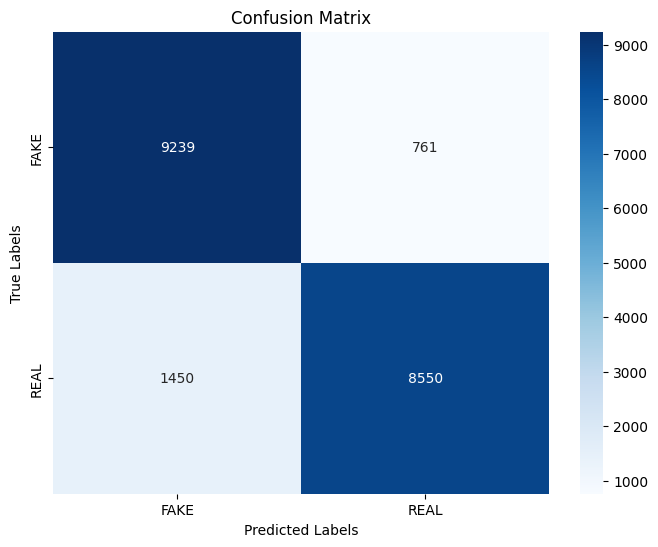

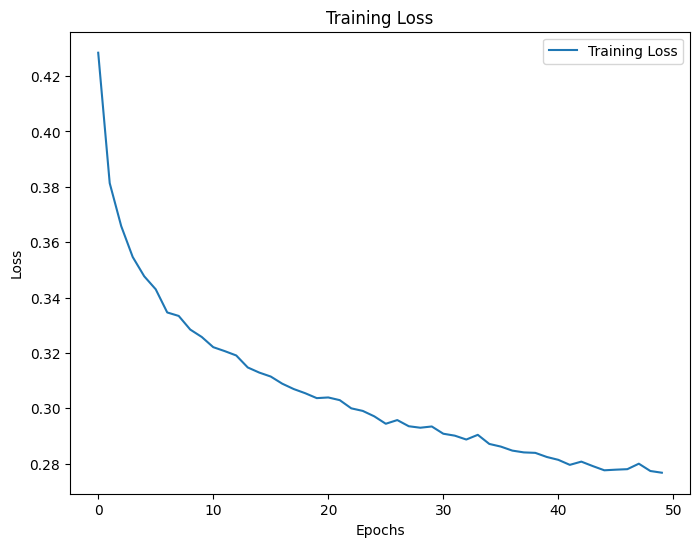

In [11]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

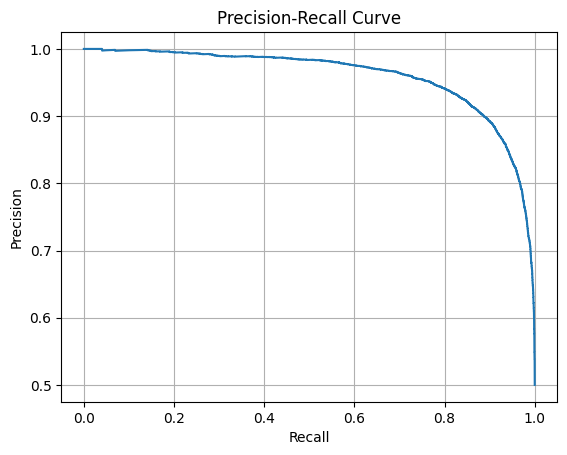

In [12]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(test_generator.labels, predictions)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

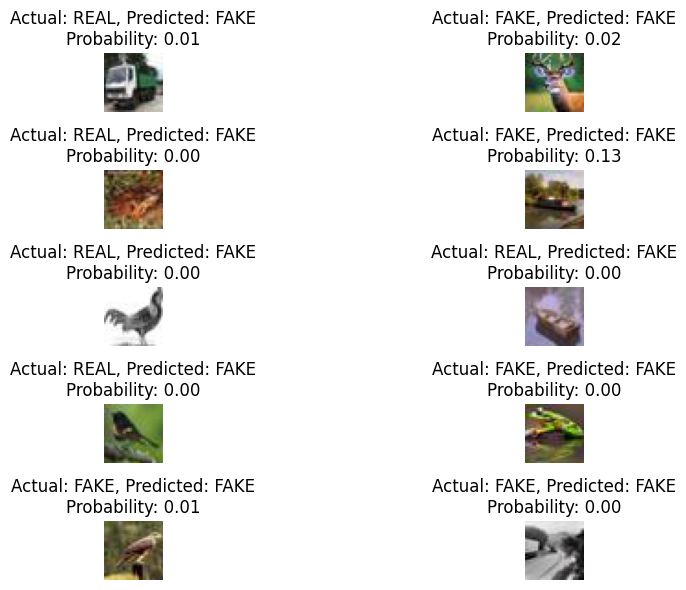

In [13]:
# Select random samples from the test data
sample_indices = np.random.choice(len(test_generator), size=10, replace=False)
sample_images = []
sample_actual_labels = []
sample_predicted_labels = []
sample_probabilities = []

for i in sample_indices:
    image, actual_labels = test_generator[i]
    predicted_label = labels[i]
    probability = predictions[i][0]
    sample_images.append(image[0])  # Access the first image in the batch
    sample_actual_labels.append(actual_labels[0])  # Access the actual label for the first image
    sample_predicted_labels.append(predicted_label)
    sample_probabilities.append(probability)

# Calculate the subplot layout based on the number of sample images
num_images = len(sample_images)
num_rows = int(np.ceil(num_images / 2))
num_cols = min(num_images, 2)

# Plot the sample images with labels and probabilities
plt.figure(figsize=(12, 6))
for i in range(len(sample_images)):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(sample_images[i])
    actual_label = "FAKE" if sample_actual_labels[i] == 0 else "REAL"
    predicted_label = "FAKE" if sample_predicted_labels[i] == 0 else "REAL"
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}\nProbability: {sample_probabilities[i]:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()